# TRABAJO FINAL

El trabajo consiste en desarrollar los modelos que vienen a continuación:

### DATAFRAME1: vinos.csv
+ Contiene el análisis quimico de diferentes tipos de vino.
+ Se solicita aplicar kmeans a fin de encontrar clusters de vinos. Tambien determinar el numero de clustes óptimo.

### DATAFRAME2: diabetes.csv
+ Contiene datos de personas que fueron diagnosticadas de diabetes (variable Outcome = 1 significa que presenta diabetes, 0 lo contrario).
+ Se pide generar un modelo de regresión (determinar si aplica regresión logística o regresión lineal) y predecir para un par de casos).

### Presentación
> **Entregable:** codigo en `R` o en `python`<br>
> **Trabajo grupal:** máximo 3 personas<br>
> **Fecha de entrega:** sab 09 de febrero 10:00 hrs
---

## Desarrollo / vinos.csv

In [1]:
# Importaciones
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

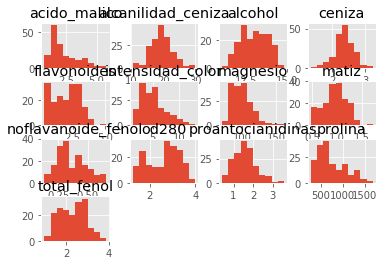

In [2]:
# Carga de datos
vinos = pd.read_csv(r"vinos.csv", sep=";")
vinos.hist()
plt.show()

In [3]:
# Definiendo X
X = pd.DataFrame(vinos)
# Within-cluster sum of squares 
wcss = []

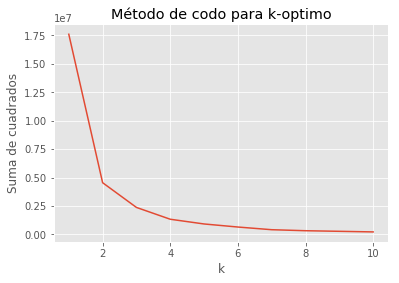

In [4]:
cluster_range = range(1, 11)
for i in cluster_range:
    clusters = KMeans(n_clusters = i)
    clusters.fit(X)
    wcss.append(clusters.inertia_)
plt.plot(cluster_range, wcss)
plt.xlabel('k')
plt.ylabel('Suma de cuadrados')
plt.title('Método de codo para k-optimo')
plt.show()

In [5]:
# k = 3
clusters = KMeans(n_clusters=3).fit(X)
predictedY = np.choose(clusters.labels_, [1, 0, 2]).astype(np.int64)
print(clusters.labels_)

[2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2 2 2 2 2 2 0 0
 2 2 0 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 1 0 1 1 0 0 0 1 1 2
 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0
 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1]


In [6]:
X.columns

Index(['alcohol', 'acido_malico', 'ceniza', 'alcanilidad_ceniza', 'magnesio',
       'total_fenol', 'flavonoides', 'noflavanoide_fenol', 'proantocianidinas',
       'intensidad_color', 'matiz', 'od280', 'prolina'],
      dtype='object')

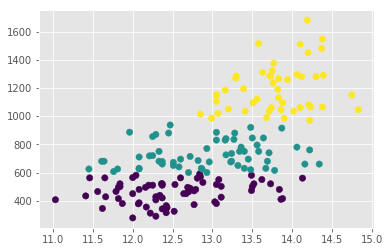

In [7]:
plt.scatter(X['alcohol'], X['prolina'], c=predictedY, s=40)
plt.show()

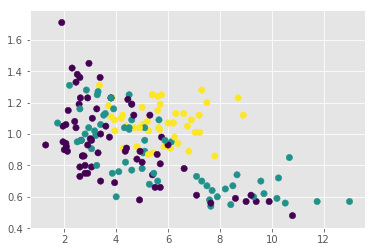

In [8]:
plt.scatter(X['intensidad_color'], X['matiz'], c=predictedY, s=40)
plt.show()

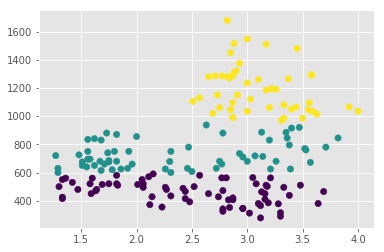

In [9]:
plt.scatter(X['od280'], X['prolina'], c=predictedY, s=40)
plt.show()